# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 設定 data_path
dir_data = '../data/Part01/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
# 先觀察有興趣的欄位
app_train["AMT_INCOME_TOTAL"].describe()

count      307511.000
mean       168797.919
std        237123.146
min         25650.000
25%        112500.000
50%        147150.000
75%        202500.000
max     117000000.000
Name: AMT_INCOME_TOTAL, dtype: float64

In [7]:
# 分為 5 區段
bins = 5
app_train['AMT_INCOME_TOTAL_BINED'] = pd.cut(app_train['AMT_INCOME_TOTAL'], bins=bins)
print(app_train['AMT_INCOME_TOTAL_BINED'].value_counts())

# 取得各區間的平均值
groups = app_train.groupby('AMT_INCOME_TOTAL_BINED')
# print(groups.size())
groups['AMT_INCOME_TOTAL'].mean()

(-91324.35, 23420520.0]      307510
(93605130.0, 117000000.0]         1
(70210260.0, 93605130.0]          0
(46815390.0, 70210260.0]          0
(23420520.0, 46815390.0]          0
Name: AMT_INCOME_TOTAL_BINED, dtype: int64


AMT_INCOME_TOTAL_BINED
(-91324.35, 23420520.0]        168417.993
(23420520.0, 46815390.0]              nan
(46815390.0, 70210260.0]              nan
(70210260.0, 93605130.0]              nan
(93605130.0, 117000000.0]   117000000.000
Name: AMT_INCOME_TOTAL, dtype: float64

In [8]:
# 以自設條件分為 5 區段
bins = [0, 100000, 200000, 300000, 500000, 150000000]
app_train['AMT_INCOME_TOTAL_BINED'] = pd.cut(app_train['AMT_INCOME_TOTAL'], bins=bins)
app_train['AMT_INCOME_TOTAL_BINED'].value_counts()

(100000, 200000]       155898
(200000, 300000]        65176
(0, 100000]             63698
(300000, 500000]        20037
(500000, 150000000]      2702
Name: AMT_INCOME_TOTAL_BINED, dtype: int64

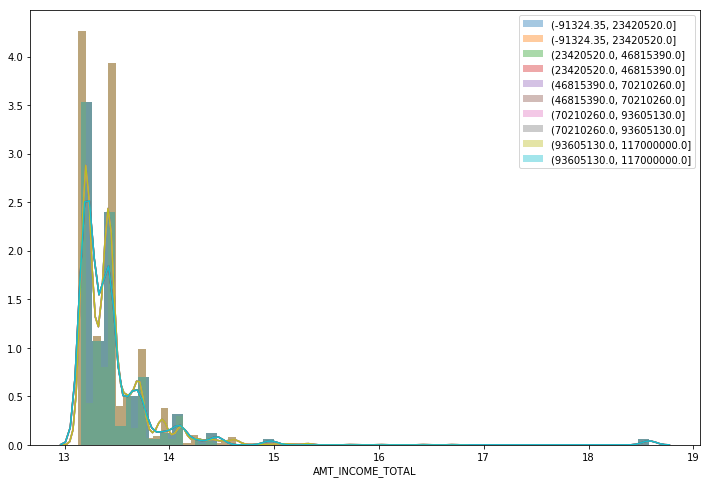

In [16]:
plt.figure(figsize=(12,8))
group_cats = groups.size().index.sort_values()

for i in range(len(group_cats)):
    sns.distplot(
        np.log(app_train.loc[
            (app_train['AMT_INCOME_TOTAL_BINED'] == group_cats[i]) & (app_train['TARGET'] == 0),
            'AMT_INCOME_TOTAL'
        ]),
        label = str(group_cats[i])
    )
    sns.distplot(
        np.log(app_train.loc[
            (app_train['AMT_INCOME_TOTAL_BINED'] == group_cats[i]) & (app_train['TARGET'] == 1),
            'AMT_INCOME_TOTAL'
        ]),
        label = str(group_cats[i])
    )
plt.legend(loc='best')
plt.show()